In [ ]:
!pip install ultralytics

# Pig


In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')


Mounted at /content/drive


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="udhtYF5oOoEgSuZ6163")
project = rf.workspace("sheranis").project("pig-1s0zt")
version = project.version(1)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pig-1 in yolov11:: 100%|██████████| 206/206 [00:01<00:00, 177.00it/s]


In [5]:
from ultralytics import SAM
# Download and initialize the model
model = SAM('/content/drive/MyDrive/pig-1/sam2_l.pt')
# Display model information (optional)
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 428M/428M [00:12<00:00, 36.0MB/s]


Model summary: 854 layers, 224,430,130 parameters, 224,430,130 gradients


(854, 224430130, 224430130, 0.0)

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/drive/MyDrive/pig-1/yolo11n.pt")


100%|██████████| 5.35M/5.35M [00:00<00:00, 248MB/s]


In [13]:

results = model.train(data='/content/drive/MyDrive/pig-1/data.yaml',
                      epochs=200, imgsz=640,batch=8, patience = 20,save_period=50,
                      seed = 42, plots = True,
                      project='pig-1', name='yolov11_results')

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/pig-1/yolo11n.pt, data=/content/drive/MyDrive/pig-1/data.yaml, epochs=200, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=None, workers=8, project=pig-1, name=yolov11_results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

wandb: Currently logged in as: 112299a (212). Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/pig-1/train/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 65, len(boxes) = 68. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/pig-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]


Plotting labels to pig-1/yolov11_results/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to pig-1/yolov11_results
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.34G     0.6702     0.8156     0.9869         13        640: 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.14it/s]

                   all         19         20      0.997       0.95      0.945      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.29G     0.6431     0.7343      1.063          8        640: 100%|██████████| 9/9 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.28it/s]

                   all         19         20      0.994       0.95      0.945      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.29G     0.6715     0.7685      1.058         10        640: 100%|██████████| 9/9 [00:00<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.52it/s]

                   all         19         20      0.994       0.95      0.945      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.29G     0.7437     0.8394      1.083          7        640: 100%|██████████| 9/9 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.07it/s]

                   all         19         20          1       0.94      0.945      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.29G     0.6742      0.785      1.014         11        640: 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.43it/s]

                   all         19         20      0.996       0.95      0.945       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.29G     0.7074     0.7916       1.05         10        640: 100%|██████████| 9/9 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.41it/s]

                   all         19         20      0.994       0.95      0.945      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.29G       0.75     0.7687      1.028          9        640: 100%|██████████| 9/9 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.54it/s]

                   all         19         20      0.995       0.95      0.945      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.28G      0.794     0.8071       1.05          7        640: 100%|██████████| 9/9 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.30it/s]

                   all         19         20          1      0.933      0.945      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.29G     0.7238      0.758      1.025         11        640: 100%|██████████| 9/9 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.29it/s]

                   all         19         20        0.9      0.903      0.941      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.29G     0.6877     0.8118      1.023         10        640: 100%|██████████| 9/9 [00:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.11it/s]

                   all         19         20      0.991       0.95      0.945      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.29G     0.6725     0.7585      1.027          8        640: 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.85it/s]

                   all         19         20      0.985       0.95      0.945      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.28G     0.6564      0.673     0.9912         11        640: 100%|██████████| 9/9 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.76it/s]

                   all         19         20       0.95       0.95      0.945      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.29G     0.7016     0.7439       1.05         10        640: 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.93it/s]

                   all         19         20      0.951       0.95      0.945      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.29G     0.6572     0.7587      1.011         11        640: 100%|██████████| 9/9 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.49it/s]

                   all         19         20      0.993       0.95      0.945      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.29G      0.724     0.7957      1.065         15        640: 100%|██████████| 9/9 [00:00<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.68it/s]

                   all         19         20      0.938       0.85      0.918       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.29G     0.6716     0.6757     0.9826          9        640: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]


                   all         19         20      0.992       0.85      0.929      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.29G     0.6381     0.7271     0.9833          8        640: 100%|██████████| 9/9 [00:00<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.15it/s]

                   all         19         20      0.992       0.85      0.932      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.29G     0.6883     0.7723     0.9992          8        640: 100%|██████████| 9/9 [00:00<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.41it/s]

                   all         19         20      0.994       0.85      0.938       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.29G     0.6332     0.6836      1.008         12        640: 100%|██████████| 9/9 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]

                   all         19         20      0.991       0.85      0.932      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.28G     0.6688     0.6549      1.013          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.86it/s]

                   all         19         20      0.994       0.85       0.94       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.29G     0.7321     0.7036      1.056         10        640: 100%|██████████| 9/9 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         19         20          1      0.885      0.937      0.733


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

21 epochs completed in 0.023 hours.
Optimizer stripped from pig-1/yolov11_results/weights/last.pt, 5.5MB
Optimizer stripped from pig-1/yolov11_results/weights/best.pt, 5.5MB

Validating pig-1/yolov11_results/weights/best.pt...
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.52it/s]


                   all         19         20      0.997       0.95      0.945      0.813
                     1         19         20      0.997       0.95      0.945      0.813
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to pig-1/yolov11_results


# PIG object detection, segmentaion, inference

In [11]:
import cv2
import numpy as np
from ultralytics import YOLO, SAM
import colorsys
import os


# Base path for all operations
BASE_PATH = r"C:\Users\xzxnt\Documents\pig_cv"

def load_image(image_path):
    return cv2.imread(image_path)

def perform_object_detection(image, yolo_model):
    results = yolo_model(image)
    return results[0].boxes.xyxy.cpu().numpy()

def perform_segmentation(image, sam_model, bbox):
    results = sam_model(image, bboxes=[bbox])
    return results[0].masks.data.cpu().numpy()[0]

def generate_distinct_colors(n):
    hsv_colors = [(i / n, 1.0, 1.0) for i in range(n)]
    rgb_colors = [colorsys.hsv_to_rgb(*hsv) for hsv in hsv_colors]
    return [(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in rgb_colors]

def process_image(image_path, yolo_model, sam_model, area_file):
    # Get the base name of the image
    output_filename = os.path.basename(image_path)
    output_name, output_ext = os.path.splitext(output_filename)

    output_image_folder = os.path.join(BASE_PATH, "Output_Image")
    os.makedirs(output_image_folder, exist_ok=True)

    annotation_folder = os.path.join(output_image_folder, "Annotation")
    os.makedirs(annotation_folder, exist_ok=True)

    # Check if the output image file already exists
    output_path = os.path.join(output_image_folder, f'sam_{output_name}{output_ext}')
    if os.path.exists(output_path):
        print(f"Skipping image '{image_path}' as it has already been processed.")
        return

    # Check if the segmentation annotation file already exists (optional)
    segmentation_data_file = os.path.join(annotation_folder, f'segmentation_data_{output_name}.txt')
    if os.path.exists(segmentation_data_file):
        print(f"Skipping image '{image_path}' as segmentation data already exists.")
        return

    # If the output image or data file doesn't exist, proceed with processing
    print(f"Processing image: {image_path}")

    # Loading input image
    image = load_image(image_path)

    # Making bounding regions
    bboxes = perform_object_detection(image, yolo_model)

    # Performing segmentation on bounding boxes
    segmentation_masks = []
    for bbox in bboxes:
        mask = perform_segmentation(image, sam_model, bbox)
        segmentation_masks.append(mask)

    # Colors for each segmentation
    colors = generate_distinct_colors(len(segmentation_masks))

    # Create output image
    output_image = image.copy()

    with open(segmentation_data_file, 'w') as f:
        for i, (mask, color) in enumerate(zip(segmentation_masks, colors), 1):
            # Find contours of the mask
            contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(output_image, contours, -1, color, 2)
            # Draw number on the segmentation
            M = cv2.moments(contours[0])
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                cv2.putText(output_image, str(i), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            # Calculate area size
            area_size = np.sum(mask)

            # Extract pixel values and write to file
            pixel_values = image[mask]
            avg_color = np.mean(pixel_values, axis=0)
            f.write(f"Segment {i}: Average RGB = {avg_color}\n")

            # Write image name and area size to the separate file
            area_file.write(f"{output_filename}, Segment {i}: Area Size = {area_size}\n")

    # Save the output image
    cv2.imwrite(output_path, output_image)
    print(f"Output image saved as '{output_path}'")
    print(f"Segmentation data saved in '{segmentation_data_file}'")

def main():
    # Load models
    yolo_weights_path = os.path.join(BASE_PATH, "yolov11_results/weights/best.pt")
    sam_weights_path = os.path.join(BASE_PATH, "sam2_l.pt")
    yolo_model = YOLO(yolo_weights_path)
    sam_model = SAM(sam_weights_path)

    # Open the area size file
    area_size_file_path = os.path.join(BASE_PATH, "area_sizes7.txt")
    with open(area_size_file_path, 'a') as area_file:  # Append mode to keep previous data
        # Process all images in the folder
        image_folder = os.path.join(BASE_PATH, "IR_batch7_1")
        for filename in os.listdir(image_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(image_folder, filename)
                process_image(image_path, yolo_model, sam_model, area_file)

    print(f"Area sizes saved in '{area_size_file_path}'")

if __name__ == "__main__":
    main()


Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_18_7_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_27_57_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_37_48_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_47_38_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_57_29_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_13_8_17_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_14_17_9_1.png' as it has already been processed.
Skipping image 'C:\Users\xzxnt\Documents\pig_cv\IR_batch7_1\700016_2023_2_17_14_27_0_1.png' as it has already been

In [2]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available

True


In [82]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu118
0.20.1+cu118


In [43]:
import torch
import torchvision

print(torch.__version__)        # Should print: 2.5.0+cu121
print(torchvision.__version__)  # Should print: 0.20.0+cu121
print(torch.cuda.is_available())  # Should return True if CUDA is available

2.5.0+cu121
0.20.0+cpu
True


## combine data from multile area




In [46]:
import re
from collections import defaultdict

# Paths to the input files
file1_path = r"C:\Users\xzxnt\Documents\pig_cv\pig-1\area_sizes_1.txt"
file2_path = r"C:\Users\xzxnt\Documents\pig_cv\pig-1\area_sizes.txt"

# Path to the output file
output_file_path = r"C:\Users\xzxnt\Documents\pig_cv\pig-1\combined_area_sizes.txt"

# Function to extract the file name, segment, and area size from a line
def extract_data(line):
    # Regular expression to capture the file name, segment number, and area size
    match = re.match(r'(.+?), Segment (\d+): Area Size = (\d+)', line)
    if match:
        file_name = match.group(1)  # The full file name
        segment = int(match.group(2))  # Segment number
        area_size = int(match.group(3))  # Area size as an integer
        return file_name, segment, area_size
    return None, None, None

# Function to read and process a file
def process_file(file_path, data_dict):
    with open(file_path, 'r') as file:
        for line in file:
            file_name, segment, area_size = extract_data(line)
            if file_name:
                # Append the area size to the appropriate list for the given file name
                data_dict[file_name].append((segment, area_size))

# Dictionary to store area sizes by file name
data_by_file = defaultdict(list)

# Process both files
process_file(file1_path, data_by_file)
process_file(file2_path, data_by_file)

# Write the combined data to the output file
with open(output_file_path, 'w') as output_file:
    # Write the header
    output_file.write("File, " + ", ".join([f"Segment {i}" for i in range(1, 21)]) + "\n")  # Max 20 segments in the header

    # Write the data for each file
    for file_name, segments in data_by_file.items():
        # Sort segments by segment number
        sorted_segments = sorted(segments, key=lambda x: x[0])
        
        # Extract the area sizes for each segment in order
        area_sizes = [str(area_size) for _, area_size in sorted_segments]

        # Write the file name and the area sizes to the output file, padding with empty strings if necessary
        output_file.write(f"{file_name}, " + ", ".join(area_sizes) + "\n")

print(f"Combined data saved to '{output_file_path}'")

Combined data saved to 'C:\Users\xzxnt\Documents\pig_cv\pig-1\combined_area_sizes.txt'


## data extrated to individual txt file

In [62]:
import os

def segmentation_data(input_filepath, valid_ids):
    # Get the directory of the input file
    output_dir = os.path.dirname(input_filepath)
    
    # Read the input file
    with open(input_filepath, 'r') as f:
        input_data = f.read()
    
    # Dictionary to store data for each ID
    id_data = {}
    
    # Process each line
    lines = input_data.strip().split('\n')
    header = lines[0].split(', ')
    
    # Skip header row
    for line in lines[1:]:
        if not line.strip():
            continue
            
        parts = line.split(', ')
        filename = parts[0]
        
        # Extract ID from filename (anything before the first '_')
        file_id = filename.split('_')[0]
        
        # Check if the extracted file_id is in the valid_ids array
        if file_id not in valid_ids:
            continue
        
        # Get all segment values
        segments = parts[1:]
        
        # Store in dictionary
        if file_id not in id_data:
            id_data[file_id] = []
        id_data[file_id].append((filename, segments))
    
    # Write separate files for each ID
    for file_id, data in id_data.items():
        output_filepath = os.path.join(output_dir, f'{file_id}_segments.txt')
        with open(output_filepath, 'w') as f:
            # Write header
            f.write('Filename')
            for i in range(1, 21):  # Assuming max 20 segments
                f.write(f',Segment_{i}')
            f.write('\n')
            
            # Write data rows
            for filename, segments in data:
                f.write(filename)
                # Fill empty segments with blank values
                for i in range(20):
                    if i < len(segments):
                        f.write(f',{segments[i]}')
                    else:
                        f.write(',')
                f.write('\n')



In [86]:
import os

def process_segmentation_data_batch1_2(input_filepath, valid_ids):
    # Get the output directory (same as input file directory)
    output_dir = os.path.dirname(input_filepath)
    
    # Read the input file
    with open(input_filepath, 'r') as file:
        lines = file.readlines()

    # Dictionary to store data for each ID
    segmentation_data = {}

    # Process each line of the input file
    for line in lines:
        # Strip any unwanted whitespace
        line = line.strip()
        if not line:
            continue
        
        # Split the line into filename and segments
        parts = line.split(', ')
        filename = parts[0]
        segments = parts[1:]
        
        # Extract the file ID (assuming it's the first part of the filename)
        file_id = int(filename.split('_')[0])
        
        # Filter by valid IDs (in this case, check against `valid_ids`)
        if file_id not in valid_ids:
            continue
        
        # Initialize the list for the file ID if it doesn't exist
        if file_id not in segmentation_data:
            segmentation_data[file_id] = []
        
        # Append the filename and its segments to the corresponding file ID
        segmentation_data[file_id].append((filename, segments))
    
    # Write the filtered data to separate output files
    for file_id, data in segmentation_data.items():
        output_filepath = os.path.join(output_dir, f'{file_id}_segments.txt')
        
        with open(output_filepath, 'w') as output_file:
            # Write the header, assuming up to 20 segments
            header = 'Filename' + ''.join([f',Segment_{i+1}' for i in range(20)]) + '\n'
            output_file.write(header)
            
            # Write each filename and its corresponding segment data
            for filename, segments in data:
                output_file.write(filename)
                # Write up to 20 segments, filling missing segments with empty values
                for i in range(20):
                    if i < len(segments):
                        output_file.write(f',{segments[i]}')
                    else:
                        output_file.write(',')
                output_file.write('\n')

# Example usage:
# Define the valid IDs array
id_valids_1 = [981, 29, 151, 928, 44, 919, 43, 152, 970, 804, 31, 850, 974, 154, 153]
id_valids_2  = [931, 138, 848, 777, 809, 927, 984, 849, 775, 139, 850, 866, 506]
# Call the function with the updated valid IDs list
#process_segmentation_data(r"C:\Users\xzxnt\Documents\pig_cv\area_sizes1.txt" , id_valids_1)
process_segmentation_data_batch1_2(r"C:\Users\xzxnt\Documents\pig_cv\area_sizes1.txt" , id_valids_1)
process_segmentation_data_batch1_2(r"C:\Users\xzxnt\Documents\pig_cv\area_sizes2.txt" , id_valids_2)

In [65]:
valid_ids_3 = [
    "947", "842", "16", "950",
    "814", "782", "158", "73",
    "40", "49", "951", "790",
    "15", "14", "157"
]
# Example usage:
input_filepath = r"C:\Users\xzxnt\Documents\pig_cv\area_sizes3.txt"
segmentation_data(input_filepath, valid_ids_3)

In [16]:
# Example usage
valid_ids_4 = [
    "40054", "40086", "40051", "40040",
    "40319", "40115", "40987", "40141",
    "40114", "40883", "40026", "40867",
    "40060", "40076", "40069"
]
# Example usage:
input_filepath = r"C:\Users\xzxnt\Documents\pig_cv\area_sizes4.txt"
segmentation_data(input_filepath,valid_ids_4)

In [17]:
valid_ids_5 = [
    "50805", "50089", "50221", "50151", "50974", "50919", "50094",
    "50222", "50981", "50043", "50078", "50079", "50031", "50152"
]

# Call the function with the input file path and valid IDs
input_filepath = r"C:\Users\xzxnt\Documents\pig_cv\area_sizes5.txt"
segmentation_data(input_filepath, valid_ids_5)

In [18]:
valid_ids_6 = [
    "60809", "60206", "60048", "60984", "60092",
    "60038", "60039", "60155", "60093", 
    "60866", "60049"
]
# Call the function with the input file path and valid IDs
input_filepath = r"C:\Users\xzxnt\Documents\pig_cv\area_sizes6.txt"
segmentation_data(input_filepath, valid_ids_6)

In [21]:
# Example usage
valid_ids_7 = [
    "70157", "70947", "70040", "70950",
    "70014", "70814", 
    "70790", "70951"
]

# Call the function with the input file path and valid IDs
input_filepath = r"C:\Users\xzxnt\Documents\pig_cv\area_sizes7.txt"
segmentation_data(input_filepath, valid_ids_7)

### area 1 besing extraded and data being sorted 


In [23]:
import csv
import os
import re
from datetime import datetime

def sort_pig_segments(pig_ids, directory_path, start_date, end_date):
    """
    Sort segment data for multiple pig IDs, filtering by date range in filenames.
    Only "Segment 1: Area Size" is processed if multiple segments are present.
    
    Args:
        pig_ids (list): List of pig ID strings.
        directory_path (str): Path to directory containing the segment files.
        start_date (str): Start date in 'YYYY_M_D' or 'YYYY_MM_DD' format.
        end_date (str): End date in 'YYYY_M_D' or 'YYYY_MM_DD' format.
        
    Returns:
        dict: Dictionary with pig IDs as keys and processing status as values.
    """
    
    def extract_date_from_filename(filename):
        """Extract date from the filename (supporting both single and double digits for month/day)."""
        match = re.search(r'(\d{4})_(\d{1,2})_(\d{1,2})', filename)
        if match:
            year, month, day = match.groups()
            return datetime(int(year), int(month), int(day))
        return None
    
    def extract_area_size(segment_info):
        """Extract the numeric area size from the 'Segment 1: Area Size = X' string."""
        match = re.search(r'Segment 1: Area Size = (\d+)', segment_info)
        if match:
            return int(match.group(1))  # Return the numeric value
        return None
    
    # Convert input date strings to datetime objects
    start_date = datetime.strptime(start_date, '%Y_%m_%d')
    end_date = datetime.strptime(end_date, '%Y_%m_%d')
    
    results = {}
    
    for pig_id in pig_ids:
        try:
            # Construct input and output file paths
            input_filename = f"{pig_id}_segments.txt"
            input_filepath = os.path.join(directory_path, input_filename)
            output_filename = f"{pig_id}_segments_sorted.txt"
            output_filepath = os.path.join(directory_path, output_filename)
            
            # Check if input file exists
            if not os.path.exists(input_filepath):
                results[pig_id] = f"Error: Input file {input_filename} not found"
                continue
            
            # Read and process the file
            rows = []
            with open(input_filepath, 'r', newline='') as infile:
                reader = csv.reader(infile)
                header = next(reader)  # Store the header
                
                for row in reader:
                    if len(row) >= 2:  # Ensure we have at least filename and segment data
                        filename = row[0]
                        segment_info = row[1]
                        
                        # Only keep rows with "Segment 1: Area Size"
                        if "Segment 1: Area Size" not in segment_info:
                            continue
                        
                        # Extract the date from the filename
                        file_date = extract_date_from_filename(filename)
                        
                        # Filter filenames by date range
                        if file_date and start_date <= file_date <= end_date:
                            # Extract numeric area size
                            area_size = extract_area_size(segment_info)
                            if area_size is not None:
                                rows.append([filename, area_size])  # Store the filename and the numeric area size
            
            # Sort rows by the extracted date in the filename
            rows.sort(key=lambda x: extract_date_from_filename(x[0]))
            
            # Write the sorted data
            with open(output_filepath, 'w', newline='') as outfile:
                writer = csv.writer(outfile)
                writer.writerow(['filename', 'segment_1_area_size'])  # Column names
                writer.writerows(rows)  # Write the processed rows
            
            results[pig_id] = f"Success: Processed {len(rows)} rows"
            
        except Exception as e:
            results[pig_id] = f"Error: {str(e)}"
    
    return results


In [87]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2022_7_22"
end_date = "2022_8_28"

# Call the function with the valid IDs and date range
results = sort_pig_segments(id_valids_1, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 981: Success: Processed 1103 rows
Pig ID 29: Error: Input file 29_segments.txt not found
Pig ID 151: Success: Processed 1098 rows
Pig ID 928: Success: Processed 1105 rows
Pig ID 44: Error: Input file 44_segments.txt not found
Pig ID 919: Success: Processed 1072 rows
Pig ID 43: Error: Input file 43_segments.txt not found
Pig ID 152: Success: Processed 1065 rows
Pig ID 970: Success: Processed 1081 rows
Pig ID 804: Success: Processed 1086 rows
Pig ID 31: Error: Input file 31_segments.txt not found
Pig ID 850: Success: Processed 1081 rows
Pig ID 974: Success: Processed 1095 rows
Pig ID 154: Success: Processed 1090 rows
Pig ID 153: Success: Processed 1050 rows


In [81]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2022_8_26"
end_date = "2022_9_28"

# Call the function with the valid IDs and date range
results = sort_pig_segments(id_valids_2, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 931: Success: Processed 1184 rows
Pig ID 138: Success: Processed 1197 rows
Pig ID 848: Success: Processed 1199 rows
Pig ID 777: Success: Processed 1193 rows
Pig ID 809: Success: Processed 1205 rows
Pig ID 927: Success: Processed 1215 rows
Pig ID 984: Success: Processed 1213 rows
Pig ID 849: Success: Processed 1201 rows
Pig ID 775: Success: Processed 1195 rows
Pig ID 139: Success: Processed 1192 rows
Pig ID 850: Success: Processed 1191 rows
Pig ID 866: Success: Processed 1175 rows
Pig ID 506: Success: Processed 1191 rows


In [24]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2022_9_30"
end_date = "2022_10_6"

# Call the function with the valid IDs and date range
results = sort_pig_segments(valid_ids_3, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 947: Success: Processed 884 rows
Pig ID 842: Success: Processed 878 rows
Pig ID 16: Error: Input file 16_segments.txt not found
Pig ID 950: Success: Processed 864 rows
Pig ID 814: Success: Processed 882 rows
Pig ID 782: Success: Processed 878 rows
Pig ID 158: Success: Processed 880 rows
Pig ID 73: Error: Input file 73_segments.txt not found
Pig ID 40: Error: Input file 40_segments.txt not found
Pig ID 49: Error: Input file 49_segments.txt not found
Pig ID 951: Success: Processed 885 rows
Pig ID 790: Success: Processed 862 rows
Pig ID 15: Error: Input file 15_segments.txt not found
Pig ID 14: Error: Input file 14_segments.txt not found
Pig ID 157: Success: Processed 874 rows


In [25]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2022_11_4"
end_date = "2022_11_10"

# Call the function with the valid IDs and date range
results = sort_pig_segments(valid_ids_4, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 40054: Success: Processed 789 rows
Pig ID 40086: Success: Processed 789 rows
Pig ID 40051: Success: Processed 788 rows
Pig ID 40040: Success: Processed 789 rows
Pig ID 40319: Success: Processed 789 rows
Pig ID 40115: Success: Processed 787 rows
Pig ID 40987: Success: Processed 789 rows
Pig ID 40141: Success: Processed 788 rows
Pig ID 40114: Success: Processed 788 rows
Pig ID 40883: Success: Processed 788 rows
Pig ID 40026: Success: Processed 785 rows
Pig ID 40867: Success: Processed 787 rows
Pig ID 40060: Success: Processed 786 rows
Pig ID 40076: Success: Processed 787 rows
Pig ID 40069: Success: Processed 787 rows


In [27]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2022_12_9"
end_date = "2022_12_15"

# Call the function with the valid IDs and date range
results = sort_pig_segments(valid_ids_5, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 50805: Success: Processed 834 rows
Pig ID 50089: Success: Processed 832 rows
Pig ID 50221: Success: Processed 834 rows
Pig ID 50151: Success: Processed 833 rows
Pig ID 50974: Success: Processed 833 rows
Pig ID 50919: Success: Processed 600 rows
Pig ID 50094: Success: Processed 834 rows
Pig ID 50222: Success: Processed 834 rows
Pig ID 50981: Success: Processed 832 rows
Pig ID 50043: Success: Processed 834 rows
Pig ID 50078: Success: Processed 832 rows
Pig ID 50079: Success: Processed 834 rows
Pig ID 50031: Success: Processed 832 rows
Pig ID 50152: Success: Processed 834 rows


In [28]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2023_1_13"
end_date = "2023_1_19"

# Call the function with the valid IDs and date range
results = sort_pig_segments(valid_ids_6, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 60809: Success: Processed 809 rows
Pig ID 60206: Success: Processed 808 rows
Pig ID 60048: Success: Processed 808 rows
Pig ID 60984: Success: Processed 808 rows
Pig ID 60092: Success: Processed 807 rows
Pig ID 60038: Success: Processed 806 rows
Pig ID 60039: Success: Processed 807 rows
Pig ID 60155: Success: Processed 807 rows
Pig ID 60093: Success: Processed 806 rows
Pig ID 60866: Success: Processed 807 rows
Pig ID 60049: Success: Processed 807 rows


In [29]:

# Specify the input directory and date range
directory_path = r"C:\Users\xzxnt\Documents\pig_cv"
start_date = "2023_2_17"
end_date = "2023_2_23"

# Call the function with the valid IDs and date range
results = sort_pig_segments(valid_ids_7, directory_path, start_date, end_date)

# Print the results
for pig_id, status in results.items():
    print(f"Pig ID {pig_id}: {status}")

Pig ID 70157: Success: Processed 802 rows
Pig ID 70947: Success: Processed 801 rows
Pig ID 70040: Success: Processed 802 rows
Pig ID 70950: Success: Processed 800 rows
Pig ID 70014: Success: Processed 798 rows
Pig ID 70814: Success: Processed 797 rows
Pig ID 70790: Success: Processed 795 rows
Pig ID 70951: Success: Processed 793 rows


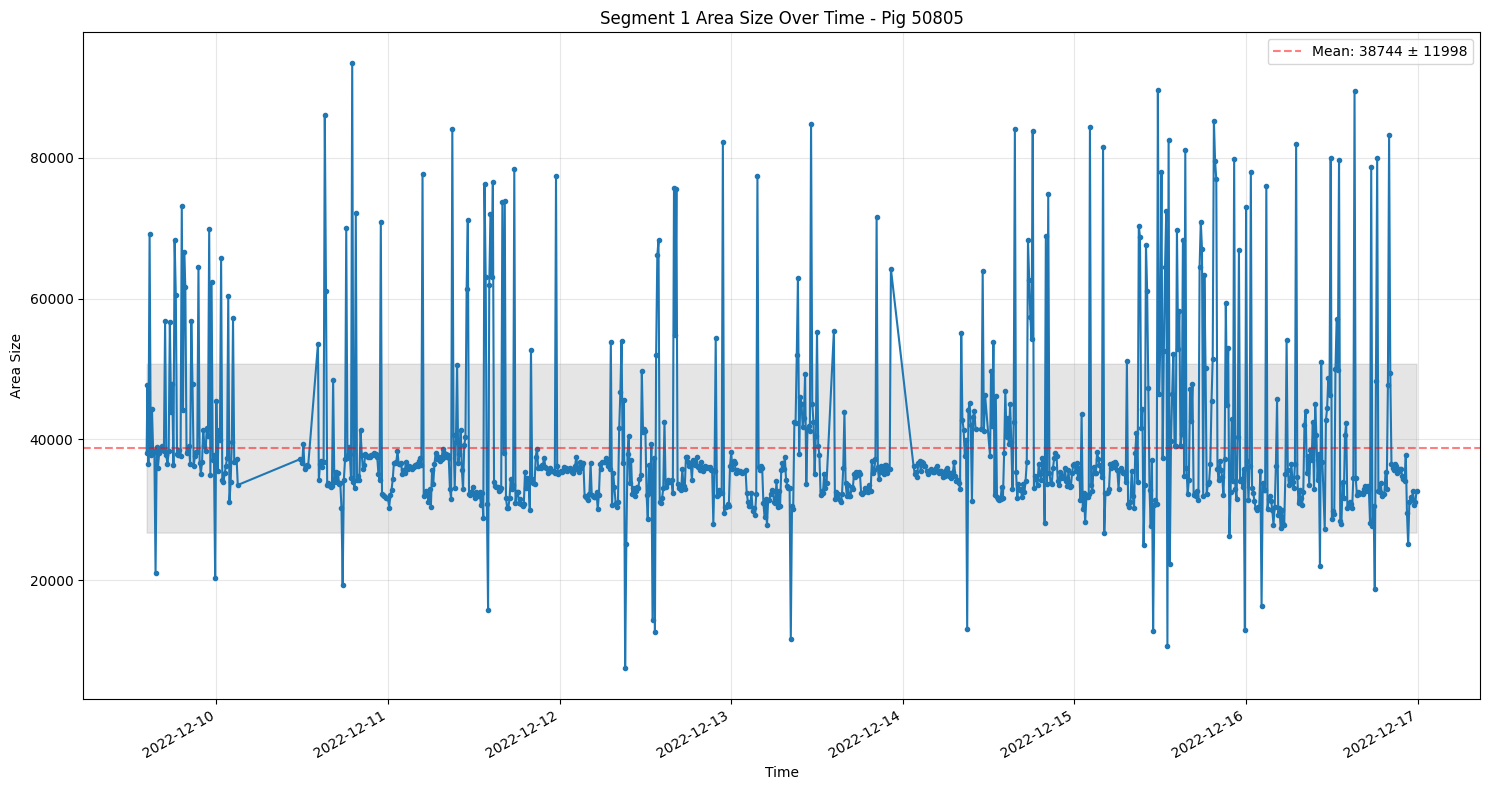


Statistics for Pig 50805:
Number of measurements: 977
Mean area size: 38744.32
Standard deviation: 11998.18
Min area size: 7472
Max area size: 93532


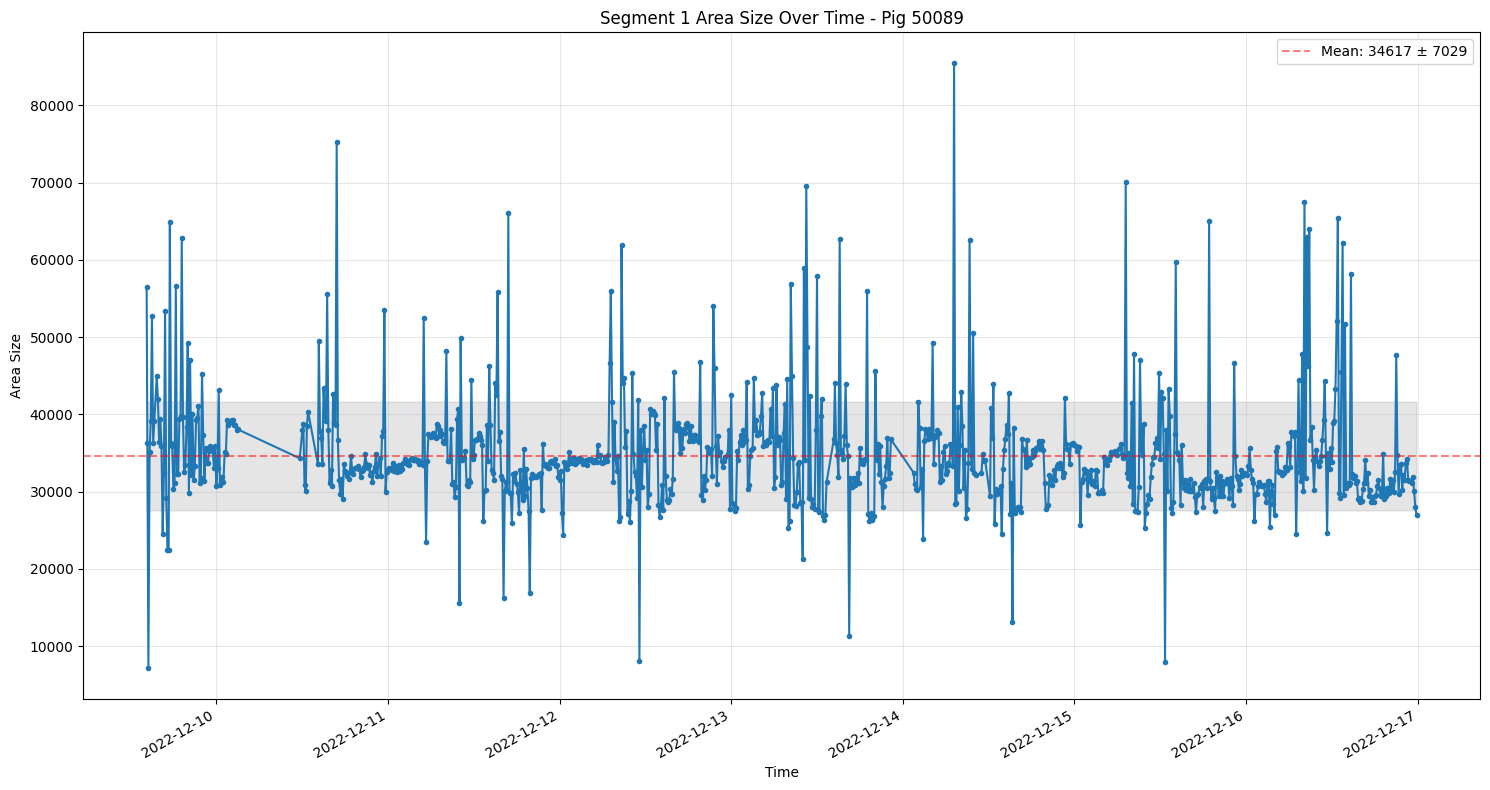


Statistics for Pig 50089:
Number of measurements: 976
Mean area size: 34617.08
Standard deviation: 7029.04
Min area size: 7147
Max area size: 85538


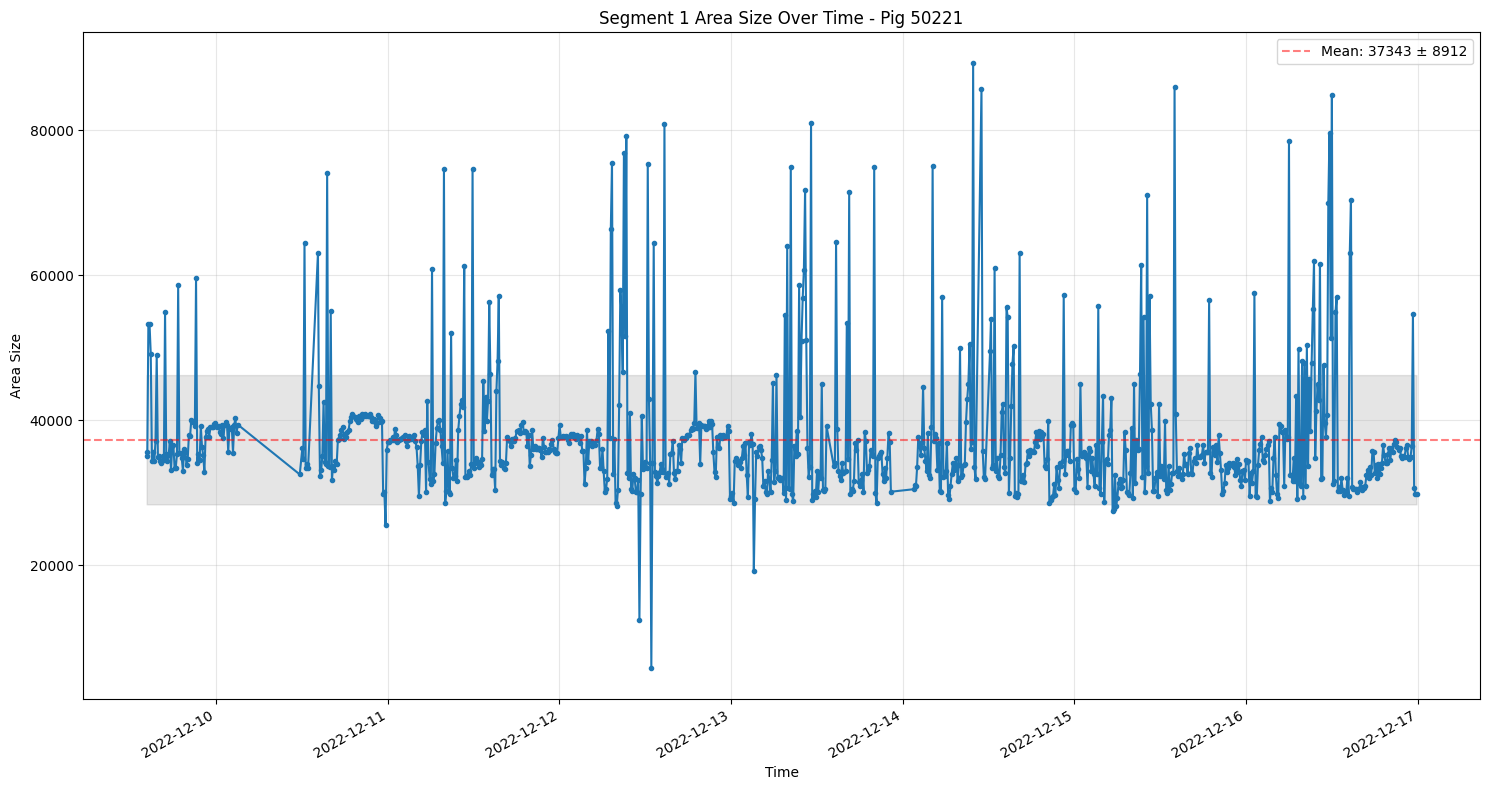


Statistics for Pig 50221:
Number of measurements: 978
Mean area size: 37342.65
Standard deviation: 8911.93
Min area size: 5822
Max area size: 89351


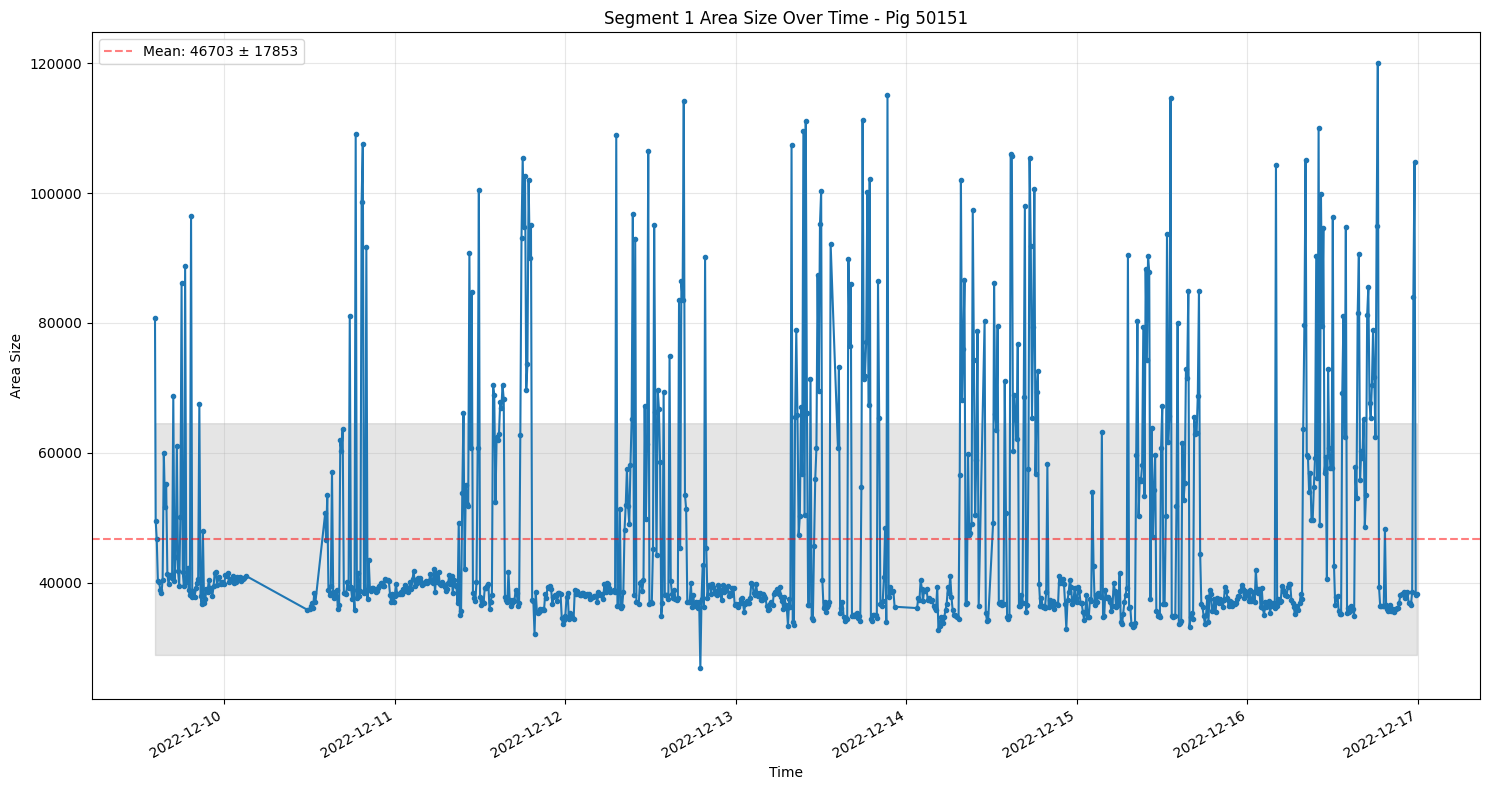


Statistics for Pig 50151:
Number of measurements: 977
Mean area size: 46703.36
Standard deviation: 17853.38
Min area size: 26802
Max area size: 120111


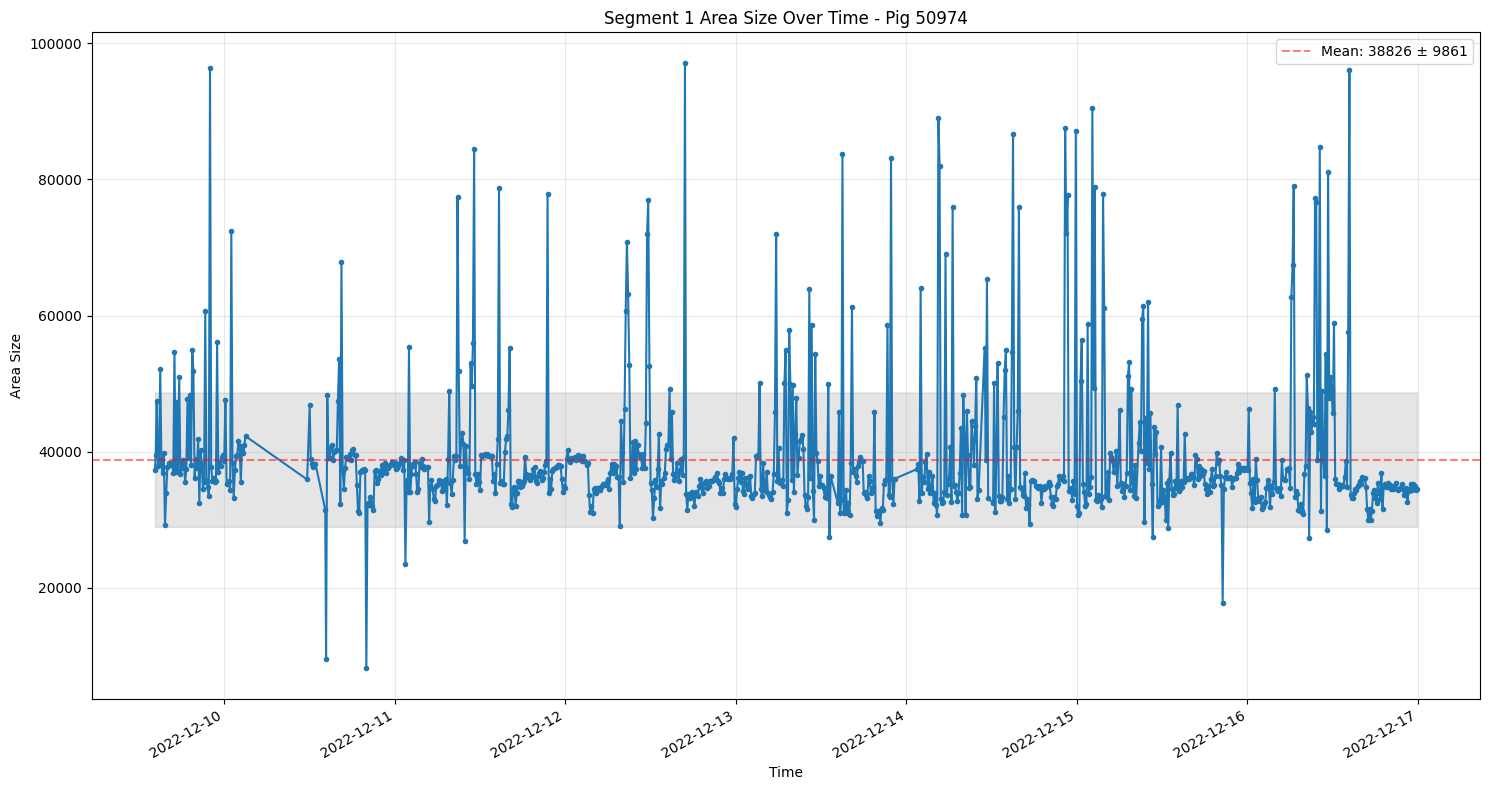


Statistics for Pig 50974:
Number of measurements: 977
Mean area size: 38826.29
Standard deviation: 9860.69
Min area size: 8178
Max area size: 97152


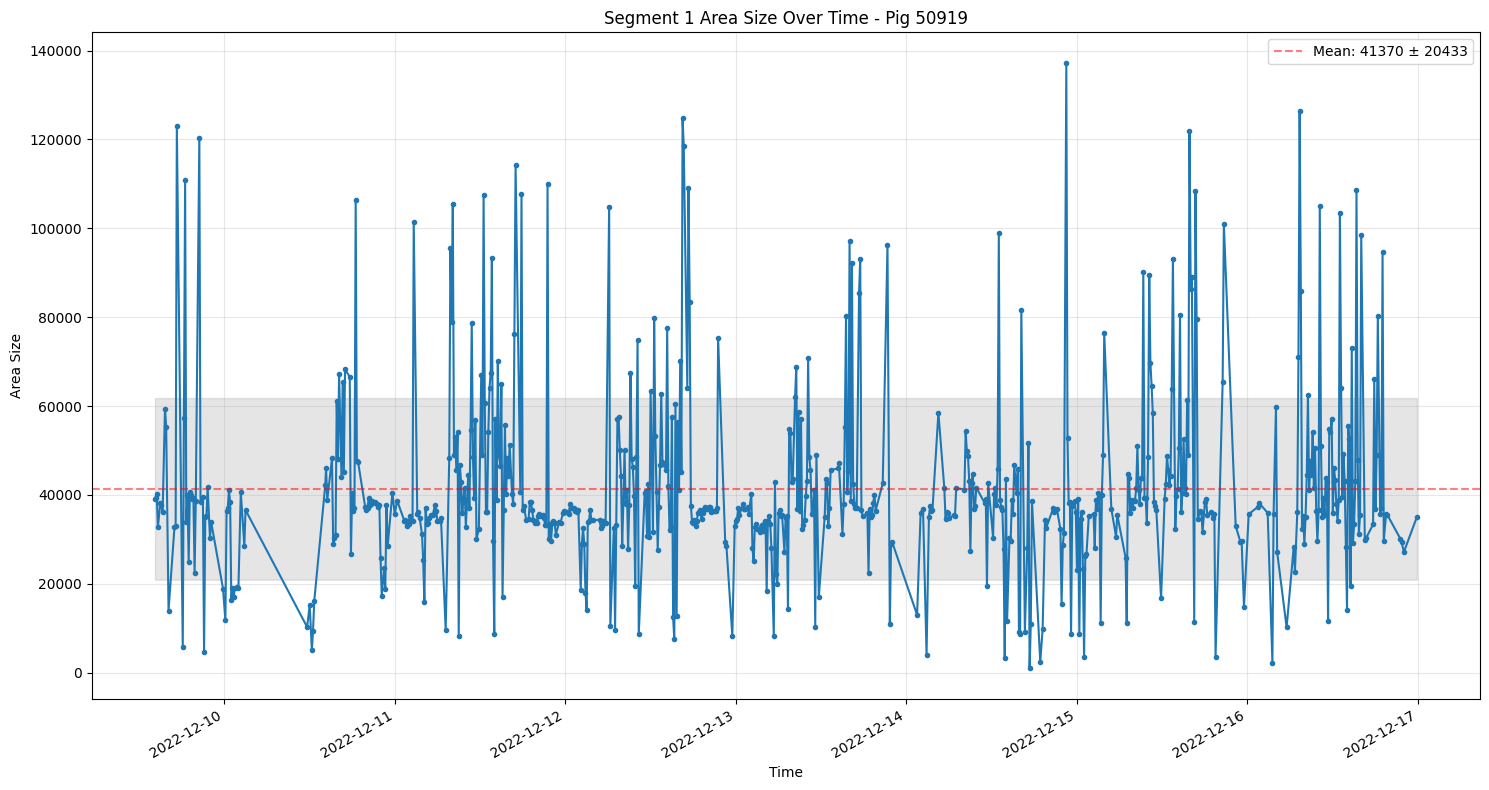


Statistics for Pig 50919:
Number of measurements: 683
Mean area size: 41369.59
Standard deviation: 20432.99
Min area size: 991
Max area size: 137295


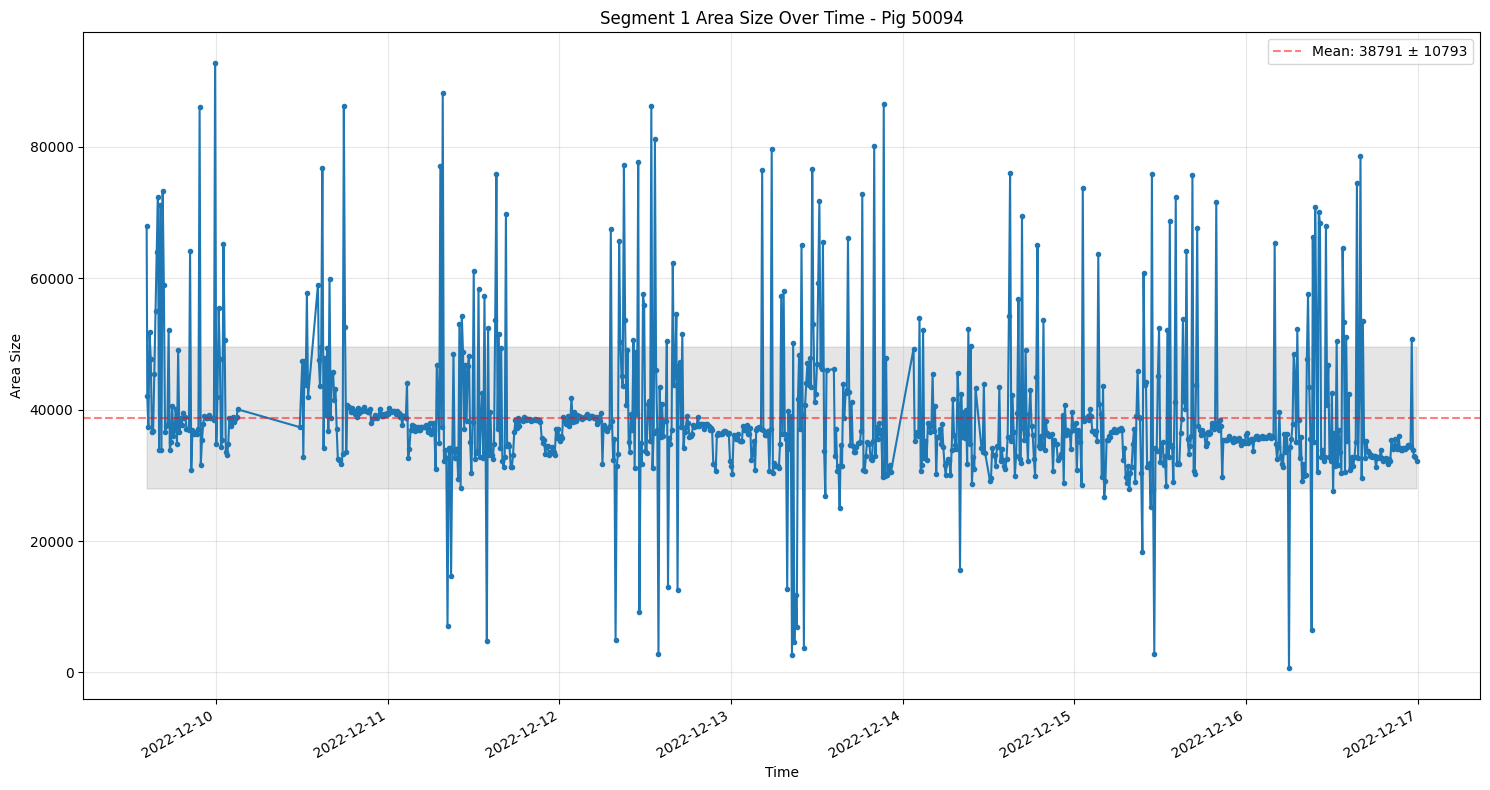


Statistics for Pig 50094:
Number of measurements: 978
Mean area size: 38790.80
Standard deviation: 10793.40
Min area size: 634
Max area size: 92806


In [1]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import os
import numpy as np

def extract_datetime_from_filename(filename):
    """Extract datetime from filename format: pigID_YYYY_MM_DD_HH_MM_SS"""
    try:
        parts = filename.split('_')
        if len(parts) >= 7:
            year = int(parts[1])
            month = int(parts[2])
            day = int(parts[3])
            hour = int(parts[4])
            minute = int(parts[5])
            second = int(parts[6].split('.')[0])  # Remove file extension
            return datetime(year, month, day, hour, minute, second)
    except (IndexError, ValueError):
        return None
    return None

def plot_segment_1_per_pig(pig_ids, directory_path):
    """
    Plot Segment 1 area size over time for each pig ID using individual sorted files.
    
    Args:
        pig_ids (list): List of pig ID strings
        directory_path (str): Path to directory containing the sorted segment files
    """
    for pig_id in pig_ids:
        # Construct the input file path for this pig
        input_filename = f"{pig_id}_segments_sorted.txt"
        input_filepath = os.path.join(directory_path, input_filename)
        
        # Check if the file exists
        if not os.path.exists(input_filepath):
            print(f"No sorted file found for pig ID: {pig_id}")
            continue
            
        # Lists to store the data
        timestamps = []
        area_sizes = []
        
        # Read the sorted file
        with open(input_filepath, 'r', newline='') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            
            for row in reader:
                if len(row) >= 2 and row[1].strip():  # Check for valid Segment 1 data
                    filename = row[0]
                    segment_1_area = int(row[1].strip())
                    
                    # Extract timestamp
                    timestamp = extract_datetime_from_filename(filename)
                    if timestamp:
                        timestamps.append(timestamp)
                        area_sizes.append(segment_1_area)
        
        # If we have data, create the plot
        if timestamps:
            # Create figure
            plt.figure(figsize=(15, 8))
            
            # Plot the data
            plt.plot(timestamps, area_sizes, marker='o', linestyle='-', markersize=3)
            
            # Calculate statistics
            mean_size = np.mean(area_sizes)
            std_size = np.std(area_sizes)
            
            # Add mean line
            plt.axhline(y=mean_size, color='r', linestyle='--', alpha=0.5, 
                       label=f'Mean: {mean_size:.0f} ± {std_size:.0f}')
            
            # Add ±1 std deviation bands
            plt.fill_between(timestamps, 
                           [mean_size - std_size] * len(timestamps),
                           [mean_size + std_size] * len(timestamps),
                           color='gray', alpha=0.2)
            
            # Customize the plot
            plt.title(f'Segment 1 Area Size Over Time - Pig {pig_id}')
            plt.xlabel('Time')
            plt.ylabel('Area Size')
            
            # Format x-axis
            plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
            
            # Add legend
            plt.legend()
            
            # Add grid
            plt.grid(True, alpha=0.3)
            
            # Adjust layout
            plt.tight_layout()
            
            # Save the plot
            output_plot_path = os.path.join(directory_path, f"{pig_id}_segment1_plot.png")
            plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
            
            # Display the plot
            plt.show()
            
            # Print statistics
            print(f"\nStatistics for Pig {pig_id}:")
            print(f"Number of measurements: {len(area_sizes)}")
            print(f"Mean area size: {mean_size:.2f}")
            print(f"Standard deviation: {std_size:.2f}")
            print(f"Min area size: {min(area_sizes)}")
            print(f"Max area size: {max(area_sizes)}")
            
        else:
            print(f"No valid data found for pig ID: {pig_id}")

# Example usage:
pig_ids = [
    "50805", "50089", "50221", "50151", "50974", "50919", "50094"
]

directory_path = r"C:\Users\xzxnt\Documents\pig_cv\pig-1\time_serious"

# Create plots for all pig IDs
plot_segment_1_per_pig(pig_ids, directory_path)